# Titanic Dataset Machine Learning Project

# **Introducción**

En este Jupyter Notebook, pasaremos por todo el proceso de creación de un modelo de Machine Learning en el famoso conjunto de datos Titanic, que es utilizado por muchas personas en todo el mundo. Proporciona información sobre el destino de los pasajeros del Titanic, resumida según la situación económica (clase), sexo, edad y supervivencia. En este desafío, vamos a intentar predecir si un pasajero del Titanic habría sobrevivido o no.

# **El RMS Titanic**

El RMS Titanic fue un crucero de pasajeros británico que se hundió en el Océano Atlántico Norte en las primeras horas de la mañana del 15 de abril de 1912, después de que chocara con un iceberg durante su viaje inaugural desde Southampton a la ciudad de Nueva York. Se estima que había 2.224 pasajeros y tripulación a bordo del barco, y más de 1.500 murieron, lo que lo convierte en uno de los desastres marítimos comerciales en tiempos de paz más mortíferos de la historia moderna. El RMS Titanic era el barco más grande a flote en el momento en que entró en servicio y fue el segundo de los tres transatlánticos de clase olímpica operados por la White Star Line. El Titanic fue construido por el astillero Harland and Wolff en Belfast. Thomas Andrews, su arquitecto, murió en el desastre.

![Titanic](https://sibillatellez.files.wordpress.com/2018/03/bfccd2da3c0525373b9dd84bcc99c6ff-750x400.jpg)

# **Importando librerías**

In [17]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [18]:
import os

# **Cargando los datos**

In [19]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Please, modify your path in th following cell.

In [20]:
path = F'/content/gdrive/My Drive/Colab Notebooks/ThreePoints/modulo-3/lessons'

Now, we load train and test dataset.

In [21]:
train_df = pd.read_csv(os.path.join(path, 'Titanic_input', 'train.csv'))
test_df = pd.read_csv(os.path.join(path, 'Titanic_input', 'test.csv'))

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [24]:
train_df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
(train_df.isnull().sum(axis=0)/train_df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [26]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Análisis y exploración de los datos**

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**El conjunto de entrenamiento tiene 891 ejemplos y 11 características + la variable objetivo (`survived`). El conjunto de testeo cuenta con 418 ejemplos.**

2 de las características son `float`, 5 son números `enteros` y 5 son `objetos`. A continuación, he enumerado las características con una breve descripción:

    Survived: Outcome of survival (0 = No; 1 = Yes)
    Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
    Name: Name of passenger
    Sex: Sex of the passenger
    Age: Age of the passenger (Some entries contain NaN)
    SibSp: Number of siblings and spouses of the passenger aboard
    Parch: Number of parents and children of the passenger aboard
    Ticket: Ticket number of the passenger
    Fare: Fare paid by the passenger
    Cabin Cabin number of the passenger (Some entries contain NaN)
    Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [29]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


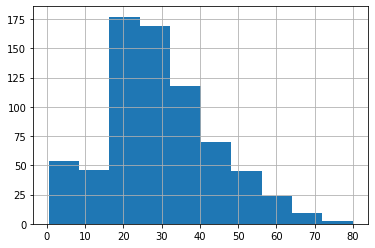

In [30]:
train_df.Age.hist()

In [31]:
train_df.Age.median()

28.0

Arriba podemos ver que **38% del conjunto de entrenamiento sobrevivió al Titanic**. También podemos ver que las edades de los pasajeros oscilan entre `0.4 y 80 años`. 
Además de eso, ya podemos detectar algunas características que contienen `missing values`, como la característica `Age`.

Echémosle un vistazo al `train dataset`.

In [32]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


De la tabla anterior, podemos observar algunas cosas. En primer lugar, **necesitamos convertir muchas funciones en numéricas** más adelante, para que los algoritmos de aprendizaje automático puedan procesarlas. Además, podemos ver que las **características tienen rangos muy diferentes**, que necesitaremos convertir aproximadamente a la misma escala. 

También podemos detectar algunas características más, que contienen valores perdidos `NaN`, que debemos tratar.

**Echemos un vistazo más detallado a los datos que realmente faltan:**

In [33]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


La función `Embarked` tiene solo 2 missing values, que se pueden completar fácilmente. Será mucho más complicado lidiar con la función `Age`, que tiene 177 missing values. La función `Cabin` necesita más investigación, pero parece que podríamos querer eliminarla del conjunto de datos, ya que falta el 77.1%.

In [34]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [35]:
train_df.keys().values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Arriba puede ver las 11 características + la variable de destino (`survived`).
**¿Qué características podrían contribuir a una alta tasa de supervivencia?**

Podríamos pensar que tendría sentido si todo, excepto `PassengerId`, `Ticket` y `Name`, se correlacionara con una alta tasa de supervivencia. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f459332d150>,
      dtype=object)

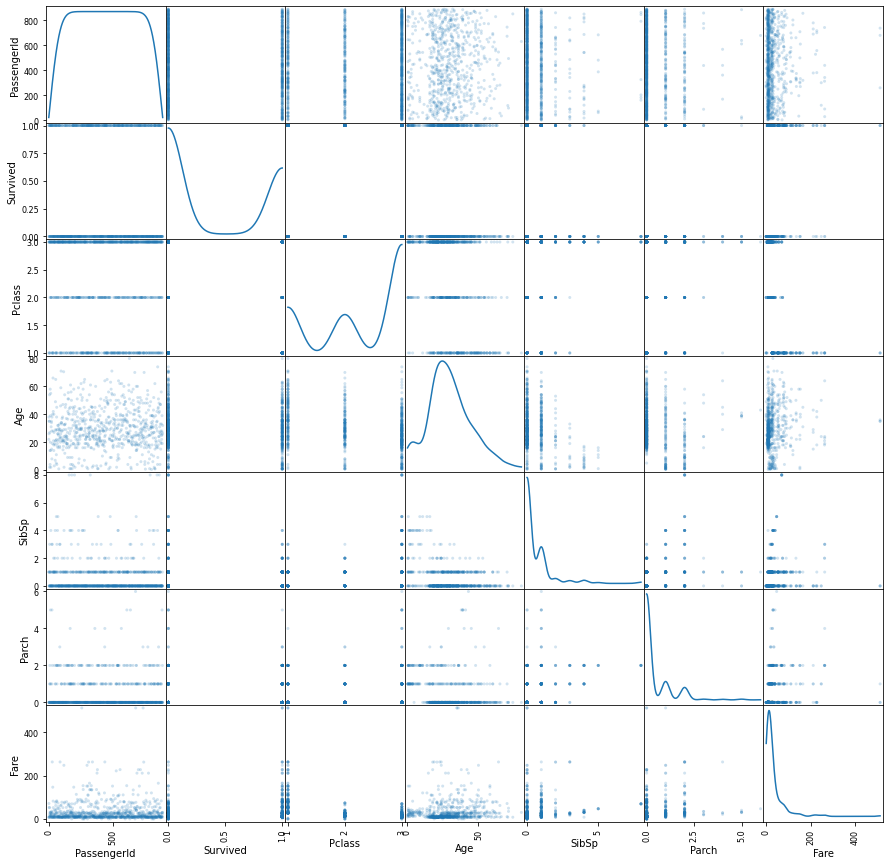

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_df, alpha=0.2, figsize=(15, 15), diagonal='kde')

**1. `Age` y `Sex`:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


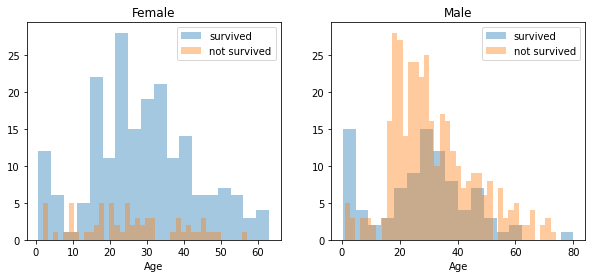

In [37]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [38]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Puede ver que los hombres tienen una alta probabilidad de supervivencia cuando tienen entre 18 y 30 años, lo que también es cierto para las mujeres, pero no del todo. Para las mujeres, las posibilidades de supervivencia son mayores entre los 14 y los 40 años.

Para los hombres, la probabilidad de supervivencia es muy baja entre los 5 y los 18 años, pero eso no es cierto para las mujeres. Otra cosa a tener en cuenta es que los bebés también tienen una probabilidad un poco mayor de supervivencia.

Dado que parece haber **ciertas edades, que tienen mayores probabilidades de supervivencia** y porque quiero que todas las funciones estén aproximadamente en la misma escala, crearemos grupos de edad más adelante.

**2. `Embarked`, `Pclass` y `Sex`:**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


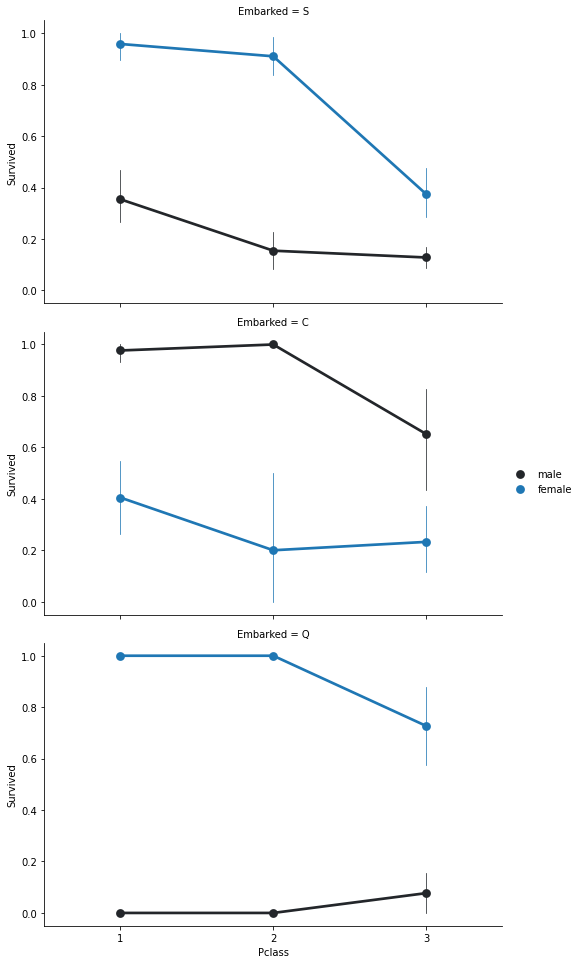

In [39]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None, errwidth=.75)
FacetGrid.add_legend()

`Embarked` parece estar correlacionado con la supervivencia, según el género.

Las mujeres en el `puerto Q` y en el `puerto S` tienen más posibilidades de sobrevivir. Lo contrario es cierto si están en el `puerto C`. Los hombres tienen una alta probabilidad de supervivencia si están en el `puerto C`, pero una probabilidad baja si están en el `puerto Q o S`.

`Pclass` también parece estar correlacionado con la supervivencia. Generaremos otro gráfico a continuación.

**3. `Pclass`:**

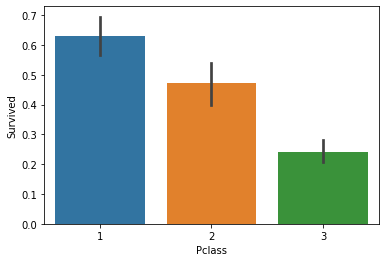

In [40]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Aquí vemos claramente que `Pclass` está contribuyendo a la posibilidad de supervivencia de una persona, especialmente si esta persona está en la `Clase 1`. Crearemos otro diagrama de pclass a continuación.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


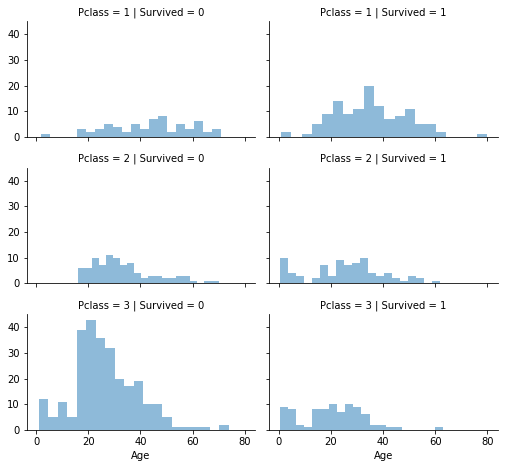

In [41]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

El gráfico anterior confirma nuestra suposición sobre la `Clase 1`, pero también podemos detectar una alta probabilidad de que una persona de la `Clase 3` no sobreviva.

**4.  `SibSp` y `Parch`:**

`SibSp` y `Parch` tendrían más sentido como una función combinada, que muestra el número total de familiares que tiene una persona en el Titanic. Lo crearemos a continuación y también una característica que siembra si alguien no está solo.

In [42]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [43]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


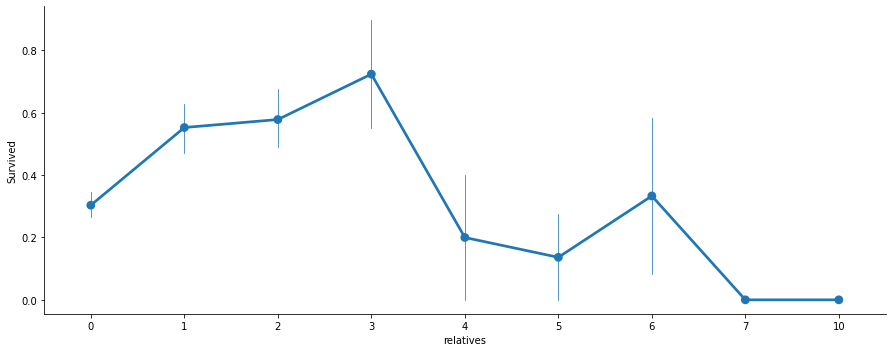

In [44]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, errwidth=.75)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


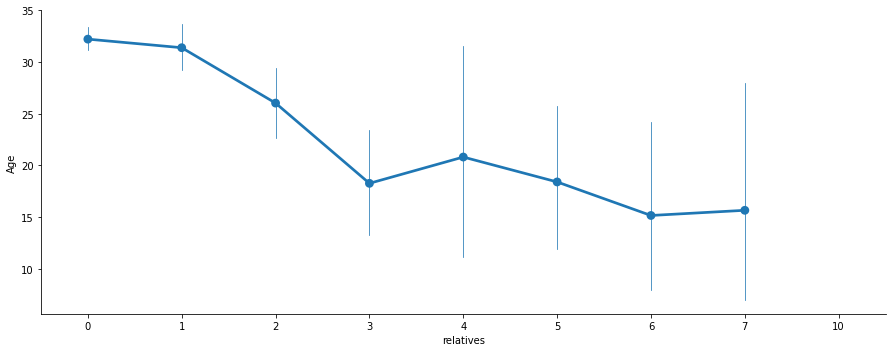

In [45]:
axes = sns.factorplot('relatives','Age', 
                      data=train_df, aspect = 2.5, errwidth=.75)

Aquí podemos ver que tuviste una alta probabilidad de supervivencia con 1 a 3 realidades, pero menor si tuviste menos de 1 o más de 3 (excepto algunos casos con 6 familiares).

# **Data Preprocessing**

Primero, eliminaremos `PassengerId` del conjunto de entrenamiento, porque no contribuye a la probabilidad de supervivencia de una persona. No lo eliminaremos del conjunto de prueba, ya que se requiere allí para el envío.

In [46]:
train_df = train_df.drop(['PassengerId'], axis=1)

## Missing Data:
### `Cabin`:
Como recordatorio, tenemos que lidiar con Cabina (687), Embarcado (2) y Edad (177).

Pensemos primero, teníamos que eliminar la variable `Cabin` pero si pensamos podemos sacar algo interesante. Un número de cabina se parece a "C123" y la letra **se refiere a la cubierta**.

Por lo tanto, vamos a extraerlos y crear una nueva función, que contiene muchas de personas. A continuación, convertiremos la función en una variable numérica. Los valores faltantes se convertirán a cero.

En la imagen de abajo puedes ver las cubiertas reales del Titanic, que van de la A a la G.

![titanic decks](http://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png)

In [47]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

In [48]:
# Ahora nos podemos quitar la característica `Cabin` tras haber inferido `Deck`. 
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [49]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone,Deck
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694,6.936027
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615,2.074282
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,8.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,8.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,8.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,8.000000


### `Age`:

Ahora podemos abordar el problema con los valores faltantes de las características de edad. Crearemos una matriz que contiene números aleatorios, que se calculan en función del valor de edad promedio con respecto a la desviación estándar y `is_null`.

In [50]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [51]:
train_df["Age"].isnull().sum()

0

### `Embarked`:

Dado que la feature `Embarked` tiene solo 2 valores perdidos, los completaremos con el más común.

In [52]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [53]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

## Transformando características:

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


Arriba puede ver que `Fare` es un float y tenemos que lidiar con 4 características categóricas: `Name`, `Sex`, `Ticket` y `EmbarKed`. Vamos a investigar y transformarnos uno tras otro.

### `Fare`:

Al convertir `Fare` de float a int64, usando la función "astype ()", pandas proporciona:

In [55]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### `Name`:
Usaremos la característica `Name` para extraer los títulos del Nombre, de modo que podamos crear una nueva función a partir de eso.

In [56]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

Nos cargamos `Name` una vez que hemos incluído la característica `Title`.

In [57]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

### `Sex`:

Convirtamos `Sex` feature de categórica a numérica.

In [58]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

### `Ticket`:

In [59]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Dado que el atributo `Ticket` tiene 681 tickets únicos, será un poco complicado convertirlos en categorías útiles. Entonces lo eliminaremos del conjunto de datos.


In [60]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

### `Embarked`:
Convirtamos `Embarked` feature de categórica a numérica.

In [61]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

## Creando Categorías:

Ahora crearemos categorías dentro de las siguientes características:

### `Age`:
Ahora necesitamos convertir la característica `Edad`. Primero lo convertiremos de flot a entero. Luego crearemos la nueva variable `AgeGroup`, categorizando cada edad en un grupo. Tengamos en cuenta que es importante poner atención en cómo forma estos grupos, ya que no desea, por ejemplo, que el 80% de sus datos caigan en un solo grupo.

In [62]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [63]:
# let's see how it's distributed
train_df['Age'].value_counts()

6    162
5    157
4    157
3    136
2    114
1     97
0     68
Name: Age, dtype: int64

### `Fare`:

Para la característica `Fare`, debemos hacer lo mismo que con la función `Age`. Pero no es tan fácil, porque si cortamos el rango de los valores de las tarifas en algunas categorías igualmente grandes, el 80% de los valores caerían en la primera categoría. Afortunadamente, podemos usar la función sklearn `qcut()`, que podemos usar para ver cómo podemos formar las categorías.

In [64]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,4,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [65]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [66]:
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

# Creando nuevas categorías

Agregaremos dos características nuevas al conjunto de datos, que se calculan a partir de otras características.

### 1. `Age` $\times$ `Class`

In [67]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

### 2.  `Fare per Person`

In [68]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [69]:
# Let's take a last look at the training set, before we start training the models.
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f459332a510>,
      dtype=object)

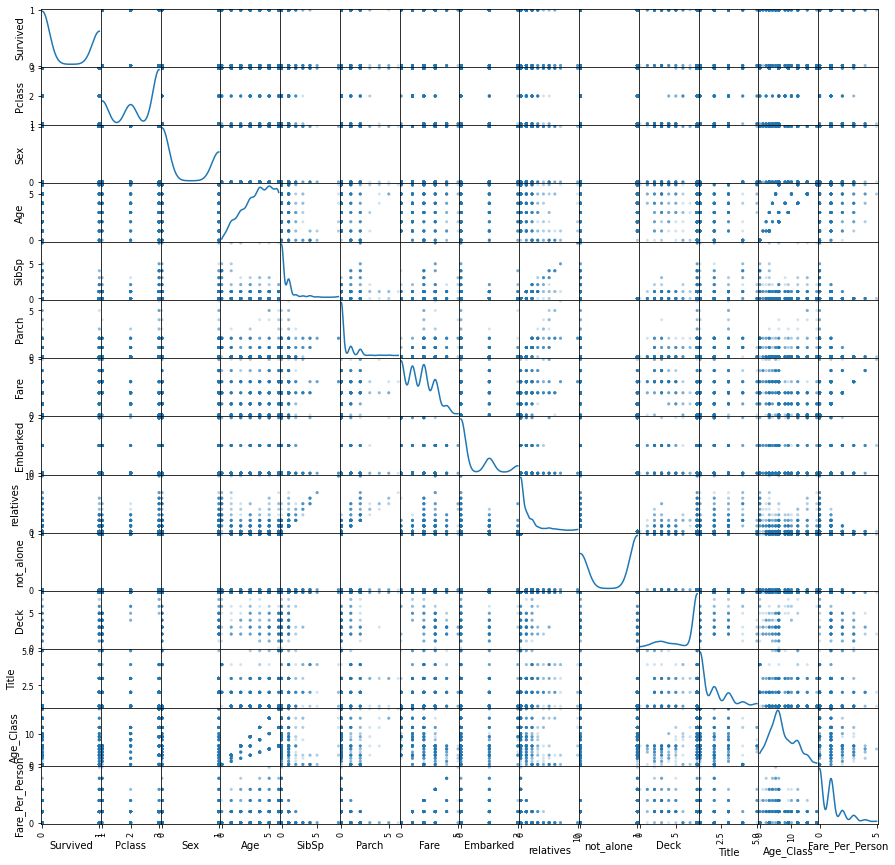

In [70]:
scatter_matrix(train_df, alpha=0.2, figsize=(15, 15), diagonal='kde')

# **Matriz de correlación**

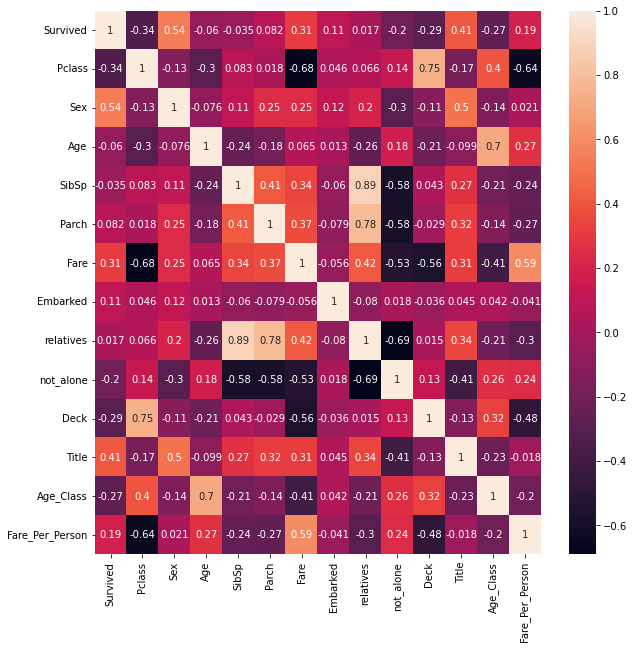

In [71]:
corrMatrix = train_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# **Construyendo modelos de Machine Learning**

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop("Survived", axis=1), train_df["Survived"], stratify=train_df["Survived"], test_size=0.2)

In [73]:
X_val  = test_df.drop("PassengerId", axis=1).copy()

In [84]:
# Stochastic Gradient Descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=100, tol=None, random_state=42)
sgd.fit(X_train, y_train)

sgd.score(X_test, y_test)

acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)


print(round(acc_sgd,2,), "%")

80.45 %


In [85]:
sgd.score(X_train, y_train)

0.7752808988764045

In [129]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print(round(acc_decision_tree,2,), "%")

75.98 %


In [99]:
round(decision_tree.score(X_train, y_train) * 100, 2)

92.98

In [108]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

81.01 %


In [107]:
round(random_forest.score(X_train, y_train) * 100, 2)

92.98

In [109]:
# Logistic Regression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

acc_log = round(logreg.score(X_test, y_test) * 100, 2)
print(round(acc_log,2,), "%")

84.36 %


In [111]:
round(logreg.score(X_train, y_train) * 100, 2)

80.62

In [114]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

acc_knn = round(knn.score(X_test, y_test) * 100, 2)
print(round(acc_knn,2,), "%")

78.77 %


In [115]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
print(round(acc_gaussian,2,), "%")

81.01 %


In [116]:
# Perceptron
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, y_train)

acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
print(round(acc_perceptron,2,), "%")

79.89 %


In [117]:
# Linear SVC
linear_svc = SVC()
linear_svc.fit(X_train, y_train)

acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
print(round(acc_linear_svc,2,), "%")

85.47 %


In [118]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
print(round(acc_linear_svc,2,), "%")

84.92 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [119]:
round(linear_svc.score(X_train, y_train) * 100, 2)

80.34

##  ¿Cuál es el mejor modelo?

In [120]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
84.92,Support Vector Machines
84.36,Logistic Regression
81.01,Random Forest
81.01,Naive Bayes
80.45,Stochastic Gradient Decent
79.89,Perceptron
78.77,KNN
75.42,Decision Tree


Como podemos ver, el clasificador `SVM` ocupa el primer lugar. Pero primero, verifiquemos cómo funciona el Bosque Aleatorio cuando usamos la validación cruzada.

## K-Fold Cross Validation:

La validación cruzada de K-Fold divide aleatoriamente los datos de entrenamiento en **K subconjuntos llamados pliegues**. Imaginemos que dividiríamos nuestros datos en 5 pliegues (K = 5). Nuestro modelo de bosque aleatorio se entrenaría y evaluaría 5 veces, utilizando un pliegue diferente para la evaluación cada vez, mientras que se entrenaría en los 4 pliegues restantes.

La siguiente imagen muestra el proceso, usando 5 pliegues (K = 5). Cada fila representa un proceso de formación + evaluación. En la primera fila, el modelo se entrena en el primer, segundo y tercer subconjunto y se evalúa en el cuarto. En la segunda fila, el modelo se entrena en el segundo, tercer y cuarto subconjunto y se evalúa en el primero. La validación cruzada de K-Fold repite este proceso hasta que cada pliegue actuó una vez como pliegue de evaluación.


![cross-v.](https://miro.medium.com/proxy/1*NyvaFiG_jXcGgOaouumYJQ.jpeg)

El resultado de nuestro ejemplo de validación cruzada de K-Fold sería una matriz que contiene 5 puntuaciones diferentes. Luego, necesitamos calcular la media y la desviación estándar de estos puntajes.

El siguiente código realiza la validación cruzada de K-Fold en nuestro modelo de bosque aleatorio, utilizando 10 pliegues (K = 10). Por lo tanto, genera una matriz con 10 puntuaciones diferentes.

In [130]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring = "accuracy")

In [131]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Median:", np.median(scores))
print("Standard Deviation:", scores.std())

Scores: [0.77622378 0.82517483 0.83802817 0.73943662 0.83802817]
Mean: 0.803378311829016
Median: 0.8251748251748252
Standard Deviation: 0.03924849549687707


Esto parece mucho más realista que antes. Nuestro modelo tiene una precisión promedio del 82% con una desviación estándar del 4%. La desviación estándar nos muestra cuán precisas son las estimaciones.

Esto significa en nuestro caso que la precisión de nuestro modelo puede diferir $\pm$4%.

La precisión sigue siendo muy buena y, dado que el bosque aleatorio es un modelo fácil de usar, intentaremos aumentar su rendimiento aún más en la siguiente sección.

# **Random Forest**

## ¿Qué es Random Forest?

Random Forest es un algoritmo de aprendizaje supervisado. Como ya puede ver por su nombre, crea un bosque y lo hace de alguna manera aleatorio. El "bosque" que construye es un conjunto de árboles de decisión, la mayoría de las veces entrenados con el método de "Bagging Ensemble". La idea general del método de ensacado es que una combinación de modelos de aprendizaje aumenta el resultado general.

Para decirlo en palabras simples: Random Forest crea múltiples árboles de decisión y los combina para obtener una predicción más precisa y estable.

Una gran ventaja del bosque aleatorio es que se puede utilizar tanto para problemas de clasificación como de regresión, que forman la mayoría de los sistemas de aprendizaje automático actuales. Con algunas excepciones, un clasificador de bosque aleatorio tiene todos los hiperparámetros de un clasificador de árbol de decisión y también todos los hiperparámetros de un clasificador de ensacado, para controlar el conjunto en sí.

El algoritmo de bosque aleatorio aporta una aleatoriedad adicional al modelo cuando hace crecer los árboles. En lugar de buscar la mejor característica mientras divide un nodo, busca la mejor característica entre un subconjunto aleatorio de características. Este proceso crea una amplia diversidad, que generalmente resulta en un mejor modelo. Por lo tanto, cuando está cultivando un árbol en un bosque aleatorio, solo se considera un subconjunto aleatorio de las características para dividir un nodo. Incluso puede hacer que los árboles sean más aleatorios, utilizando umbrales aleatorios encima de ellos, para cada característica en lugar de buscar los mejores umbrales posibles (como lo hace un árbol de decisiones normal).

A continuación puede ver cómo se vería un bosque aleatorio con dos árboles:

## Importancia de las características

Otra gran cualidad de los Random Forests es que facilitan la medición de la importancia relativa de cada característica. Sklearn mide la importancia de una característica al observar cuánto los nodos de árbol, que usan esa característica, reducen la impureza en promedio (en todos los árboles del bosque). Calcula esta puntuación automáticamente para cada función después del entrenamiento y escala los resultados para que la suma de todas las importancias sea igual a 1. Accederemos a esto a continuación:

In [132]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [133]:
importances.head(15)

,importance
feature,
Title,0.184
Sex,0.160
Age_Class,0.108
Deck,0.086
Age,0.084
Pclass,0.080
Fare,0.067
Embarked,0.059
relatives,0.056


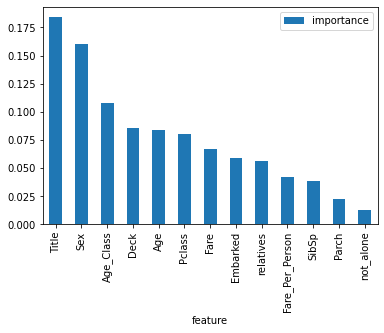

In [134]:
importances.plot.bar()

**Conclusión:**

`not_alone` y `Parch` no juegan un papel significativo en nuestro proceso de predicción de clasificadores de bosques aleatorios. 
Por eso, podemos eliminarlos del conjunto de datos y se entrenará al clasificador nuevamente. También podríamos eliminar más o menos características, pero esto necesitaría una investigación más detallada del efecto de las características en nuestro modelo. Será suficiente eliminar las dos mencionadas.

In [135]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
481,2,0,4,0,0,0,0,0,1,8,1,8,0
257,1,1,4,0,0,3,0,0,1,2,2,4,3
453,1,0,6,1,0,3,1,1,0,3,1,6,1
71,3,1,1,5,2,3,0,7,0,8,2,3,0
134,2,0,3,0,0,1,0,0,1,8,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,3,0,2,0,0,1,0,0,1,8,1,6,1
561,3,0,5,0,0,0,0,0,1,8,1,15,0
777,3,1,0,0,0,1,0,0,1,8,2,0,1
295,1,0,3,0,0,2,1,0,1,8,1,3,2


In [136]:
from sklearn.decomposition import PCA

In [137]:
pca = PCA()

In [138]:
pca.fit(X_train)

PCA()

In [139]:
X_comp = pca.transform(X_train)

In [140]:
pd.DataFrame(X_comp)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.836088,-0.803901,-1.676470,-0.129143,0.395510,1.127082,0.917174,-0.069445,0.054946,-0.036381,0.364017,-0.001965,1.536498e-16
1,-4.349419,5.300137,-0.465844,-0.571368,-0.136266,-0.641087,-0.675020,-0.802320,0.542420,-0.593013,-0.025874,0.093794,6.833432e-17
2,-1.835973,4.699762,1.072347,-0.651412,0.932510,1.137274,0.151350,0.807030,-0.669762,0.299808,-0.311375,-0.060899,-1.220037e-16
3,-5.872053,-3.829409,6.454960,0.045686,1.470550,0.305517,-0.533289,-0.198319,0.339219,-0.660114,-0.078057,-0.284850,-4.155474e-16
4,-1.444020,-0.770053,-1.816412,0.584403,0.657384,0.180265,0.387071,-0.175620,0.101624,0.052423,0.305228,0.017637,3.455267e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,-1.633402,-1.504806,-1.925703,0.020665,0.596374,-0.530268,-0.115388,-0.375207,0.117042,0.133922,-0.212446,-0.119414,2.345044e-16
708,7.735487,-0.485291,-0.616714,-0.775827,0.187596,0.136657,0.172178,-0.382638,-0.023042,0.075153,0.128340,-0.066423,-1.404925e-16
709,-7.849224,-2.530843,-2.710423,0.204543,-0.427143,-0.382407,-0.248524,-0.493523,0.161801,-0.589522,-0.377408,-0.205732,4.402231e-16
710,-4.473768,-0.005724,-2.008016,1.911528,0.896140,0.165399,0.132562,0.893832,0.259269,0.107555,0.658776,0.158491,5.159826e-16


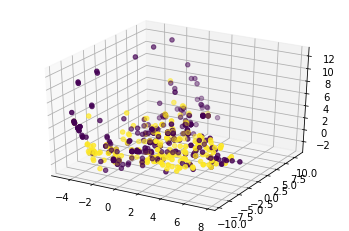

In [162]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_comp[:,1], X_comp[:, 0], X_comp[:,2], zdir='z', s=20, c=y_train, depthshade=True)

In [159]:
X_comp[0]

array([ 8.36088250e-01, -8.03901183e-01, -1.67647024e+00, -1.29142780e-01,
        3.95510253e-01,  1.12708184e+00,  9.17174291e-01, -6.94453049e-02,
        5.49456985e-02, -3.63814998e-02,  3.64016912e-01, -1.96508849e-03,
        1.53649761e-16])

In [141]:
print(pca.explained_variance_ratio_)

[6.55092966e-01 1.44629762e-01 1.05538990e-01 2.77629770e-02
 2.22158069e-02 1.37268579e-02 1.11110095e-02 9.01331789e-03
 4.76793010e-03 3.55721573e-03 1.66939491e-03 9.13771732e-04
 3.22769655e-33]


In [142]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_comp[:, 0:3], y_train)

RandomForestClassifier(oob_score=True)

In [153]:
pd.DataFrame(pca.transform(X_test))[[0,1,2]]

,0,1,2
0,-1.927111,4.782690,1.328970
1,-1.444020,-0.770053,-1.816412
2,-5.375454,-2.801938,2.555993
3,10.810105,0.032253,-0.103257
4,-1.633402,-1.504806,-1.925703
...,...,...,...
174,-3.032026,4.204763,0.861977
175,-2.944132,5.055965,-0.615614
176,-2.997815,3.243738,1.717652
177,4.179951,-0.490851,0.937257


In [154]:
acc_random_forest = round(random_forest.score(pd.DataFrame(pca.transform(X_test))[[0,1,2]], y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

75.42 %


In [ ]:
X_train  = X_train.drop(["not_alone", "Parch"], axis=1)
X_test  = X_test.drop(["not_alone", "Parch"], axis=1)

KeyError: ignored

**Entrnando Random Forest de nuevo:**

In [163]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

81.01 %


Nuestro modelo de bosque aleatorio predice tan bien como antes. Una regla general es que **cuantas más funciones tenga, más probabilidades habrá de que nuestro modelo sufra un sobreajuste/overfitting** y viceversa. Pero creo que nuestros datos se ven bien por ahora y no tienen demasiadas funciones.

También hay otra forma de evaluar un clasificador de bosque aleatorio, que probablemente sea mucho más precisa que la puntuación que usamos antes. Estamos hablando de las **out-of-bag samples** para estimar la precisión de la generalización. 

Sólo debemos en cuenta que la estimación fuera de la bolsa es tan precisa como usar un conjunto de prueba del mismo tamaño que el conjunto de entrenamiento. Por lo tanto, el uso de la estimación del error fuera de la bolsa elimina la necesidad de reservar un test dataset.

In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.78 %


Ahora podemos empezar a ajustar los hiperámetros del Random Forest. 

## Hyperparameter Tuning

A continuación puede ver el código del ajuste del hiperparámetro para el criterio de parámetros, `min_samples_leaf`, `min_samples_split` y `n_estimators`.


In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 2, 5, 10], 
              "min_samples_split" : [1, 2, 5, 10], 
              "n_estimators": [50, 100, 200]}


from sklearn.model_selection import GridSearchCV, cross_val_score
import time

rf = RandomForestClassifier()

start = time.time()
clf = GridSearchCV(estimator=rf, param_grid=param_grid,
                    n_jobs=-1, verbose=10)

clf.fit(X_train, y_train)    
stop = time.time()    

clf.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

{'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
# Time that took to execute GridSearchCV
elapsed_time = stop - start
print(elapsed_time/60, 'min')

1.1593354225158692 min


**Testeando los nuevos parámetros:**

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 18,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)

random_forest.score(X_test, y_test)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.78 %


Ahora que tenemos un modelo adecuado, podemos comenzar a evaluar su desempeño de una manera más precisa. Anteriormente, solo usábamos la precisión y la puntuación OOB, que es solo otra forma de precisión. El problema es que es más complicado evaluar un modelo de clasificación que un modelo de regresión. Hablaremos de esto en la siguiente sección.

# **Evaluación adicional**



## Confusion Matrix:

In [164]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_test, y_test, cv=5)
confusion_matrix(y_test, predictions)

array([[95, 15],
       [22, 47]])

La primera fila trata sobre las predicciones de no supervivientes: **117 pasajeros fueron clasificados correctamente como no supervivientes** (llamados verdaderos negativos) y **20 donde fueron clasificados erróneamente como no supervivientes** (falsos negativos).

La segunda fila trata sobre las predicciones de supervivientes: **24 pasajeros fueron clasificados erróneamente como supervivientes** (falsos positivos) y **62 fueron clasificados correctamente como supervivientes** (verdaderos positivos).

Una matriz de confusión brinda mucha información sobre qué tan bien funciona su modelo, pero hay una manera de obtener aún más, como calcular la precisión de los clasificadores.

## Precision y Recall:

In [165]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))

Precision: 0.7580645161290323
Recall: 0.6811594202898551


Nuestro modelo predice el 81% de las veces la supervivencia de un pasajero correctamente (precisión). 
Recall nos informa de que nuestro modelo estima una supervivencia del 73% de las personas que realmente sobrevivieron.

## F-Score

Puede combinar precisión y recuperación en una puntuación, que se denomina F-Score. Se calcula con la media armónica de precisión y recuperación. 

Tengamos en cuenta que asigna mucho más peso a los valores bajos. Como resultado de eso, el clasificador solo obtendrá un puntaje F alto, si tanto el recall como la precisión son altos.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.7380952380952381

Ahí lo tenemos, una F-Score del 77%. La puntuación no es tan alta, porque tenemos un recall del 73%.

Pero, lamentablemente, la F-Score no es perfecta, porque favorece a los clasificadores que tienen una precisión y una recall similares. Esto es un problema, porque a veces desea una alta precisión y, a veces, una alta recall. El caso es que una precisión creciente, a veces resulta en un recall decreciente y viceversa (dependiendo del umbral). 
Esto se denomina curva de precisión / recall. Discutiremos esto en la siguiente sección.


## Precision Recall Curve

Para cada persona que el algoritmo Random Forest tiene que clasificar, calcula una probabilidad basada en una función y clasifica a la persona como superviviente (cuando el puntaje es mayor que el umbral) o como no superviviente (cuando el puntaje es menor que el umbral). Por eso el umbral juega un papel importante.

Trazaremos la precisión y recall con el umbral usando matplotlib:

In [ ]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)

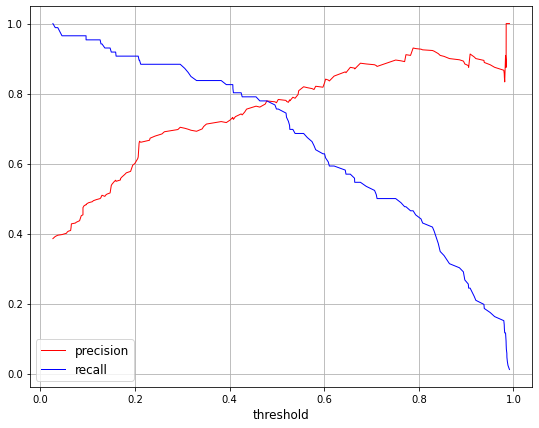

In [ ]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=1.)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=1.)
    plt.xlabel("threshold", fontsize=12)
    plt.legend(loc="lower left", fontsize=12)
    plt.grid()

plt.figure(figsize=(9,7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Arriba se puede ver claramente que la recall está cayendo rápidamente con una precisión de alrededor del 85%. Por eso, es posible que desee seleccionar la compensación de precisión/recall antes de eso, tal vez alrededor del 75%.

Ahora podemos elegir un umbral que le brinde la mejor compensación de precisión / recall para su problema actual de ML. Si desea, por ejemplo, una precisión del 80%, puede mirar fácilmente los gráficos y ver que necesitaría un umbral de alrededor de `0.4`. Entonces podríamos entrenar un modelo con exactamente ese umbral y obtendría la precisión deseada.

Otra forma es trazar la precisión y recall entre sí:

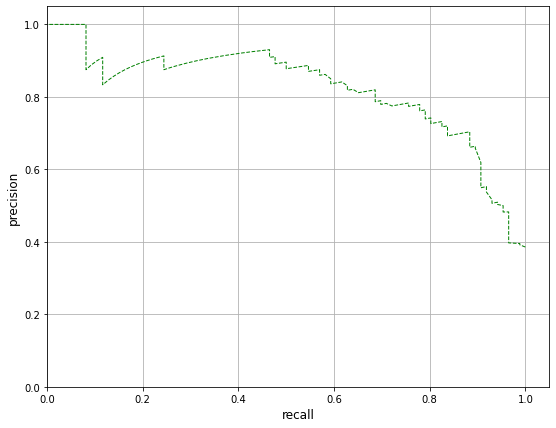

In [ ]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=1.)
    plt.xlabel("recall", fontsize=12)
    plt.ylabel("precision", fontsize=12)
    plt.axis([0, 1.05, 0, 1.05])
    plt.grid()

plt.figure(figsize=(9,7))
plot_precision_vs_recall(precision, recall)
plt.show()

## Curva ROC AUC

La curva ROC AUC proporciona otra forma de evaluar y comparar su clasificador binario. Esta curva traza la tasa de verdaderos positivos (también llamada recall) contra la tasa de falsos positivos (proporción de instancias negativas clasificadas incorrectamente), en lugar de trazar la precisión frente a la recall.

In [ ]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)

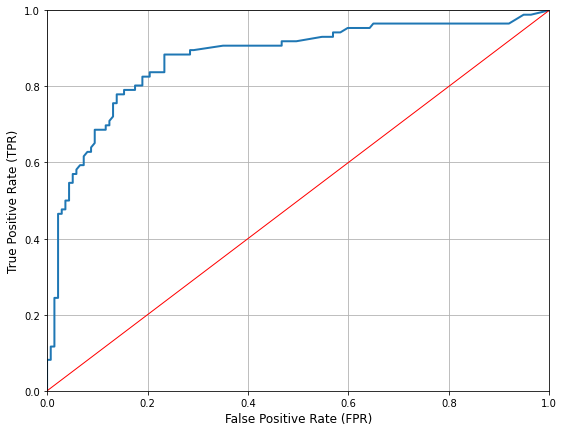

In [ ]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=1.)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)
    plt.grid()

plt.figure(figsize=(9, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

La línea roja en el medio representa un clasificador puramente aleatorio (por ejemplo, un lanzamiento de moneda) y, por lo tanto, su clasificador debe estar lo más lejos posible de él. Nuestro modelo Random Forest parece hacer un buen trabajo.

## ROC AUC Score
La puntuación ROC AUC es la score correspondiente a la curva ROC AUC. Simplemente se calcula midiendo el área bajo la curva, que se llama AUC.

Un clasificador que sea 100% correcto, tendría un puntaje ROC AUC de 1 y un clasificador completamente aleatorio tendría un puntaje de 0.5.

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_test, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8729842132065865


# **Resumen**

Con este proyecto hemos cubierto significativamente el conocimiento de aprendizaje automático y hemos fortalecido fortalecí la capacidad de aplicar conceptos en un problema distinto y bastante interesante. Este proyecto se centró mucho en la parte de preparación de datos, ya que esto es en lo que los científicos de datos trabajan la mayor parte de su tiempo.

Se comenzó con la exploración de datos, se corrigieron missing values y se estimó qué características son importantes. Durante este proceso utilizamos seaborn y matplotlib para hacer las visualizaciones. 

Durante la parte de preprocesamiento de datos, se calcularon los valores faltantes, se convirtieron las características categóricas en numéricas, hemos agrupado los valores en categorías y se crearon algunas características nuevas.

Posteriormente, se entrenaron 8 modelos diferentes de aprendizaje automático, se eligió el que mejor precisión arrojaba _a priori_ y se aplicó validación cruzada. Explicamos cómo funciona el bosque aleatorio, y la importancia que asigna a las diferentes características y ajusté su rendimiento optimizando sus valores de hiperparámetros. 

Por último, se echó un vistazo a su matriz de confusión y se calculó la precisión de los modelos, la recall y la F-Score.

Por supuesto, todavía hay margen de mejora, como hacer una ingeniería de características más extensa, comparando y trazando las características entre sí e identificando y eliminando las características ruidosas. Otra cosa que puede mejorar el resultado general sería un ajuste de hiperparámetros más extenso en varios modelos de aprendizaje automático. 

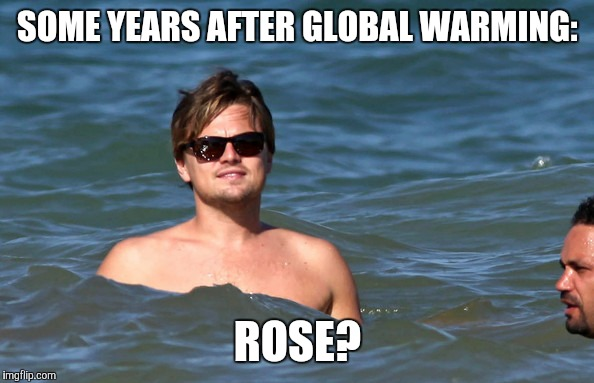